**Tweet Emotion Recognition**

**1. Install all libraries required**

In [4]:
!pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which i

**2. Importing libraries**

In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datasets import load_dataset
from tensorflow import keras

**3. Importing Data**

In [101]:
data_set = load_dataset('emotion')

In [102]:
data_set.shape

{'train': (16000, 2), 'validation': (2000, 2), 'test': (2000, 2)}

In [103]:
train=data_set['train']
test=data_set['test']
validate=data_set['validation']
train

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [104]:
def get_text(data):
  tweet=data['text']
  label=data['label']
  return tweet,label

In [105]:
tweet_train, label_train =get_text(train)
tweet_train[9],label_train[9]

('i feel romantic too', 2)

In [106]:
tweet_val, label_val =get_text(validate)
tweet_val[9],label_val[9]

('i feel dirty and ashamed for saying that', 0)

**4. Tokenizing**

In [107]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
token=Tokenizer(num_words=10000,oov_token='<OOV>')
token.fit_on_texts(tweet_train)

def val(token,data):
  value=token.texts_to_sequences(data)
  value_pad=pad_sequences(value,maxlen=50,padding='post',truncating='post')
  return value_pad


In [108]:
value_pad_train=np.array(val(token,tweet_train))
value_pad_val=np.array(val(token,tweet_val))
label_train=np.array(label_train)
label_val=np.array(label_val)

**5. Building & Training the model**

In [109]:
model=tf.keras.Sequential([
    tf.keras.Input(shape=(50,)),
    tf.keras.layers.Embedding(10000,16),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6,activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)        │ (None, 50, 16)         │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_24                │ (None, 50, 40)         │         5,920 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_25                │ (None, 40)             │         9,760 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │           246 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 175,926 (687.21 KB)

 Trainable params: 175,926 (687.21 KB)

 Non-trainable params: 0 (0.00 B)

In [110]:
model.fit(value_pad_train,label_train,epochs=10,validation_data=(value_pad_val,label_val))

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 35s 59ms/step - accuracy: 0.3776 - loss: 1.5187 - val_accuracy: 0.6845 - val_loss: 0.8877
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 31s 61ms/step - accuracy: 0.7505 - loss: 0.6786 - val_accuracy: 0.8055 - val_loss: 0.5573
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 39s 57ms/step - accuracy: 0.8760 - loss: 0.3646 - val_accuracy: 0.8355 - val_loss: 0.5046
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 30s 59ms/step - accuracy: 0.9231 - loss: 0.2404 - val_accuracy: 0.8655 - val_loss: 0.4503
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 48s 74ms/step - accuracy: 0.9520 - loss: 0.1578 - val_accuracy: 0.8740 - val_loss: 0.4272
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 34s 60ms/step - accuracy: 0.9607 - loss: 0.1287 - val_accuracy: 0.8845 - val_loss: 0.4011
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 47s 72ms/step - accuracy: 0.9680 - loss: 0.0959 - val_accuracy: 0.8790 - val_loss: 0.4380
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 37s 64ms/step - accuracy: 0.9740 - loss: 0.0802 - 

In [112]:
model.history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**6. Loss & Accuracy Curves**

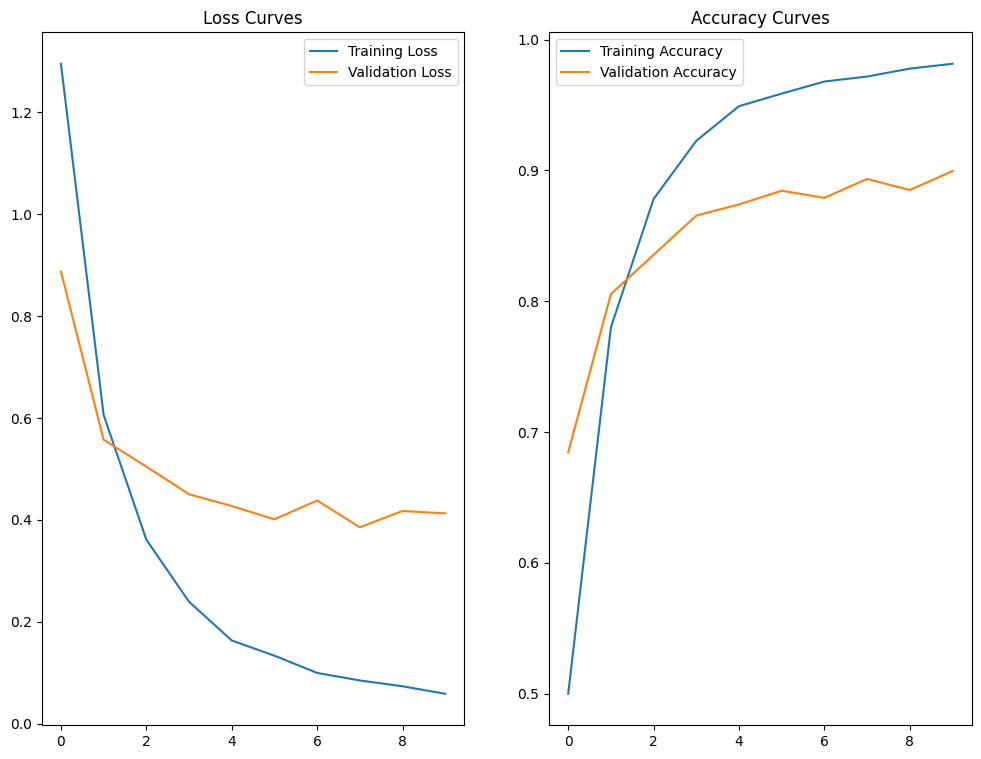

In [113]:
plt.figure(figsize=(12,9))
plt.subplot(1,2,1)
plt.plot(model.history.history['loss'],label='Training Loss')
plt.plot(model.history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.title('Loss Curves')
plt.subplot(1,2,2)
plt.plot(model.history.history['accuracy'],label='Training Accuracy')
plt.plot(model.history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curves')
plt.show()


**7. Evaluation**

In [114]:
tweet_test, label_test =get_text(test)
value_pad_test=np.array(val(token,tweet_test))
label_test=np.array(label_test)
value_pad_test=np.array(value_pad_test)
eval= model.evaluate(value_pad_test,label_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8881 - loss: 0.4259


**8. Prediction**

In [115]:
pred=model.predict(value_pad_test)
pred_class=np.argmax(pred,axis=1)


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step


In [116]:
for i in range(10):
  print('Tweet:', tweet_test[i])
  print('Actual Emotion:', label_test[i])
  print('Predicted Emotion:', pred_class[i])
  print('----------------------------------------------')


Tweet: im feeling rather rotten so im not very ambitious right now
Actual Emotion: 0
Predicted Emotion: 0
----------------------------------------------
Tweet: im updating my blog because i feel shitty
Actual Emotion: 0
Predicted Emotion: 0
----------------------------------------------
Tweet: i never make her separate from me because i don t ever want her to feel like i m ashamed with her
Actual Emotion: 0
Predicted Emotion: 0
----------------------------------------------
Tweet: i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived
Actual Emotion: 1
Predicted Emotion: 1
----------------------------------------------
Tweet: i was feeling a little vain when i did this one
Actual Emotion: 0
Predicted Emotion: 0
----------------------------------------------
Tweet: i cant walk into a shop anywhere where i do not feel uncomfortable
Actual Emotion: 4
Predicted Emotion: 4
----------------------------------------------
Tweet: i felt

**9. Confusion Matrix & Heatmaps**

Text(50.722222222222214, 0.5, 'Actual Class')

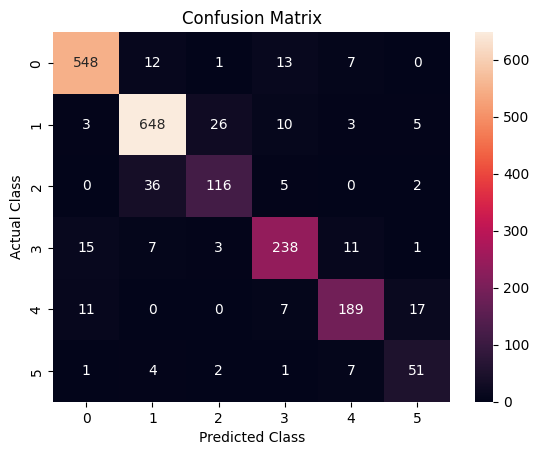

In [117]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(label_test,pred_class)
heatmap=sns.heatmap(cm,annot=True,fmt='g')
heatmap.set_title('Confusion Matrix')
heatmap.set_xlabel('Predicted Class')
heatmap.set_ylabel('Actual Class')